In [80]:
%reload_ext autoreload
%autoreload 2

import sys
from pathlib import Path 
current_path = Path().resolve()
abs_path = str(current_path.parent)
sys.path.append(abs_path)

RAW_PATH = current_path.parent / 'data' / 'raw'
OUTPUT_PATH = current_path.parent / 'data' / 'output'
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# from plotly.plotly import iplot
import plotly.graph_objs as go
import plotly.io as pio

# plotly.tools.set_credentials_file(username='d116626', api_key='rCLXowBHHQLJHHzTxSNM')
init_notebook_mode(connected=True)

import numpy as np


import missingno as msno



import qgrid

def qg(df):
    return(qgrid.show_grid(df,show_toolbar=True, grid_options={'forceFitColumns': False}))

pd.set_option("display.max_rows",200)


In [81]:
def miss(df):
    msno.matrix(df,width_ratios=(10,1),\
                figsize=(20,8),color=(0,0, 0),fontsize=12,sparkline=True,labels=True)

def miss_p(df):
    return(round(df.isnull().mean(),4)*100)
    
    
def describe(df):
    stats = ['skew', 'mad', 'kurt']

    df_info = pd.DataFrame()
    df_info['type'] = df.dtypes
    df_info['miss'] = miss_p(df)

    d = df.describe(include='all')
    dd = d.append(df.reindex_axis(d.columns, 1).agg(stats))
    df_describe_t = dd.transpose()
    df_info = pd.concat([df_info,df_describe_t],axis=1)
    
    df_t = indexess(df)
    
    df_info= pd.concat([df_info,df_t],axis=1)


    return df_info.sort_values(by='indexs')


def indexess(df):

    cols  = df.columns
    indexs = [i for i in range(len(df.columns))]

    df_t = pd.DataFrame()
    df_t['indexs'] = indexs
    df_t.index = cols
    
    return df_t


In [82]:
contratacoes = pd.read_csv('%s/bnds_base_contratacoes_transparente.csv' %RAW_PATH)

In [83]:
df_contrat = contratacoes.copy()

df_contrat.columns = df_contrat.columns.str.replace(' ','_').str.lower().str.replace('/','_')

In [84]:
describe(df_contrat)

,type,miss,count,unique,top,freq,mean,std,min,25%,50%,75%,max,mad,skew,kurt,indexs
cliente,object,0.0,18488,3504,RIO GRANDE ENERGIA SA,194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
cnpj,int64,0.0,18488,NaN,NaN,NaN,2.72793e+13,2.68662e+13,0,7.08039e+12,1.45222e+13,4.5257e+13,9.84081e+13,2.28647e+13,1.00877,-0.241944,1
descrição_do_projeto,object,0.0,18488,5104,PROGRAMA DE MODERNIZACAO DA ADMINISTRACAO TRIB...,177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
uf,object,0.0,18488,28,SP,4345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
município,object,0.0,18488,1014,SEM MUNICÍPIO,6164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
município_-_código,int64,0.0,18488,NaN,NaN,NaN,2.40582e+06,1.90583e+06,0,0,3.14196e+06,3.55031e+06,1e+07,1.64317e+06,0.21149,0.330881,5
número_do_contrato,int64,0.0,18488,NaN,NaN,NaN,1.04236e+07,4.86899e+06,202711,7.2082e+06,1.05421e+07,1.32134e+07,9.92633e+07,3.51942e+06,4.50274,82.923,6
data_da_contratação,object,0.0,18488,2651,2010-12-20 00:00:00,344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
valor_contratado__r$,float64,0.0,18488,NaN,NaN,NaN,4.42395e+07,2.01821e+08,599.84,2.22807e+06,8.851e+06,2.90022e+07,9.89e+09,5.61853e+07,22.3986,791.643,8
valor_desembolsado_r$,float64,0.0,18488,NaN,NaN,NaN,3.79627e+07,1.83443e+08,0,1.26019e+06,6.55383e+06,2.40294e+07,9.89e+09,4.93281e+07,25.9267,1071.88,9


In [85]:
df_contrat_cliente = df_contrat.groupby(by='cliente',as_index=False).sum()

In [86]:
df_contrat_cliente.head(2)

,cliente,cnpj,município_-_código,número_do_contrato,valor_contratado__r$,valor_desembolsado_r$,juros,prazo_-_carência_(meses),prazo_-_amortização_(meses)
0,3CON CONSULTORIA E SISTEMAS S.A.,65699100000101,3547304,16203451,10000000.0,10088544.54,4.45,24,48
1,A GAZETA DO ESPIRITO SANTO RADIO E TV LTDA,54127452000240,6410618,24401682,1675000.0,1141749.98,5.58,60,120


In [87]:
df_contrat_cliente_value = df_contrat_cliente.sort_values(by=['valor_contratado__r$','valor_desembolsado_r$'], ascending=False)[['cliente','valor_contratado__r$','valor_desembolsado_r$']]

In [88]:

df_contrat_cliente_value['delta_contradado_desembolsado'] = df_contrat_cliente_value['valor_contratado__r$']- df_contrat_cliente_value['valor_desembolsado_r$']

In [261]:
df_contrat['situação_do_contrato'].unique()

array(['LIQUIDADO', 'ATIVO'], dtype=object)

In [262]:
cols = ['cliente','situação_do_contrato']

In [263]:
df_contrat_ativo_gb = df_contrat.groupby(by=cols, as_index=False).sum()[['cliente','situação_do_contrato','valor_contratado__r$','valor_desembolsado_r$']]

In [264]:
df_contrat_ativo_gb['delta_contradado_desembolsado'] = df_contrat_ativo_gb['valor_contratado__r$']- df_contrat_ativo_gb['valor_desembolsado_r$']

In [265]:
df_contrat_ativo_gb.head(2)

,cliente,situação_do_contrato,valor_contratado__r$,valor_desembolsado_r$,delta_contradado_desembolsado
0,3CON CONSULTORIA E SISTEMAS S.A.,ATIVO,10000000.0,10088544.54,-88544.54
1,A GAZETA DO ESPIRITO SANTO RADIO E TV LTDA,ATIVO,1675000.0,1141749.98,533250.02


In [266]:
cols = ['valor_contratado__r$','valor_desembolsado_r$','cliente','situação_do_contrato']
df_contrat_ativo_gb = df_contrat_ativo_gb.sort_values(by=cols,ascending=False)

In [267]:
df_contrat_cliente_value.head(2)


,cliente,valor_contratado__r$,valor_desembolsado_r$,delta_contradado_desembolsado
2710,PETROLEO BRASILEIRO S A PETROBRAS,3.371824e+10,3.310477e+10,6.134632e+08
2551,NORTE ENERGIA S/A,2.538781e+10,2.338940e+10,1.998411e+09


In [268]:
cols = {'valor_contratado__r$':'total_valor_contratado__r$', 'valor_desembolsado_r$':'total_valor_desembolsado_r$',
       'delta_contradado_desembolsado':'total_delta_contradado_desembolsado'}

df_contrat_cliente_value_total = df_contrat_cliente_value.rename(columns=cols)


In [269]:
df_merge = pd.merge(df_contrat_ativo_gb,df_contrat_cliente_value_total,on='cliente',how='inner')

In [270]:
cols = ['total_valor_contratado__r$','cliente','situação_do_contrato']
df_merge = df_merge.sort_values(by=cols,ascending=False)

In [271]:
df_merge.head(2)

,cliente,situação_do_contrato,valor_contratado__r$,valor_desembolsado_r$,delta_contradado_desembolsado,total_valor_contratado__r$,total_valor_desembolsado_r$,total_delta_contradado_desembolsado
2,PETROLEO BRASILEIRO S A PETROBRAS,LIQUIDADO,2.040904e+10,2.040777e+10,1.270805e+06,3.371824e+10,3.310477e+10,6.134632e+08
3,PETROLEO BRASILEIRO S A PETROBRAS,ATIVO,1.330919e+10,1.269700e+10,6.121924e+08,3.371824e+10,3.310477e+10,6.134632e+08


In [243]:
def plot_classif_stack(df_merge,clas,bar_name,bar_stack_name,bar_stack,N):
    trace1 = go.Bar(
        y=df_merge[df_merge[bar_stack_name]==bar_stack[0]][bar_name],
        x=df_merge[df_merge[bar_stack_name]==bar_stack[0]][clas],
        marker=dict(
            color='rgba(240, 9, 48, 0.6)',
            line=dict(
                color='rgb(248, 248, 249)',
                width=0.5),
        ),
        name=bar_stack[0],
        orientation='h',
        )
    trace2 = go.Bar(
        y=df_merge[df_merge[bar_stack_name]==bar_stack[1]][bar_name],
        x=df_merge[df_merge[bar_stack_name]==bar_stack[1]][clas],
        marker=dict(
            color='rgba(50, 171, 96, 0.6)',
            line=dict(
                color='rgb(248, 248, 249)',
                width=0.5),
        ),
        name=bar_stack[1],
        orientation='h',
        )

    data = [trace1,trace2]

    layout = dict(title='Top %i - %s'%(N,clas),
#                   xaxis= dict(ticklen= 5,zeroline= False,
#     #                          range = [min(x_min),max(x_max)]
#     #                           range = ['2015-05-07 18:48:00',max(x_max)]
#                              ),
                  xaxis=dict(
                            autorange=True,
                            showgrid=True,
                            zeroline=False,
                            showline=False,
                            ticks='',
                            showticklabels=True
                        ),
                        yaxis=dict(
                            autorange=True,
                            showgrid=False,
                            zeroline=False,
                            showline=False,
                            ticks='',
                            showticklabels=True
                        ),
                  width=400*3.4,
                  height=360*2.5,
                  margin=go.layout.Margin(
                                            l=410,
    #                                       r=50,
    #                                       b=100,
    #                                       t=100,
    #                                       pad=4
                                        ),
    #               paper_bgcolor='rgba(1,2,0,0)',
    #               plot_bgcolor='rgba(1,2,0,0)'
                paper_bgcolor='rgb(248, 248, 255)',
                plot_bgcolor='rgb(248, 248, 255)',
                barmode='stack'

                 )



    fig = go.Figure(data=data, layout=layout)
#     plotly.offline.plot(fig)

    iplot(fig, filename='horizontal-bar')

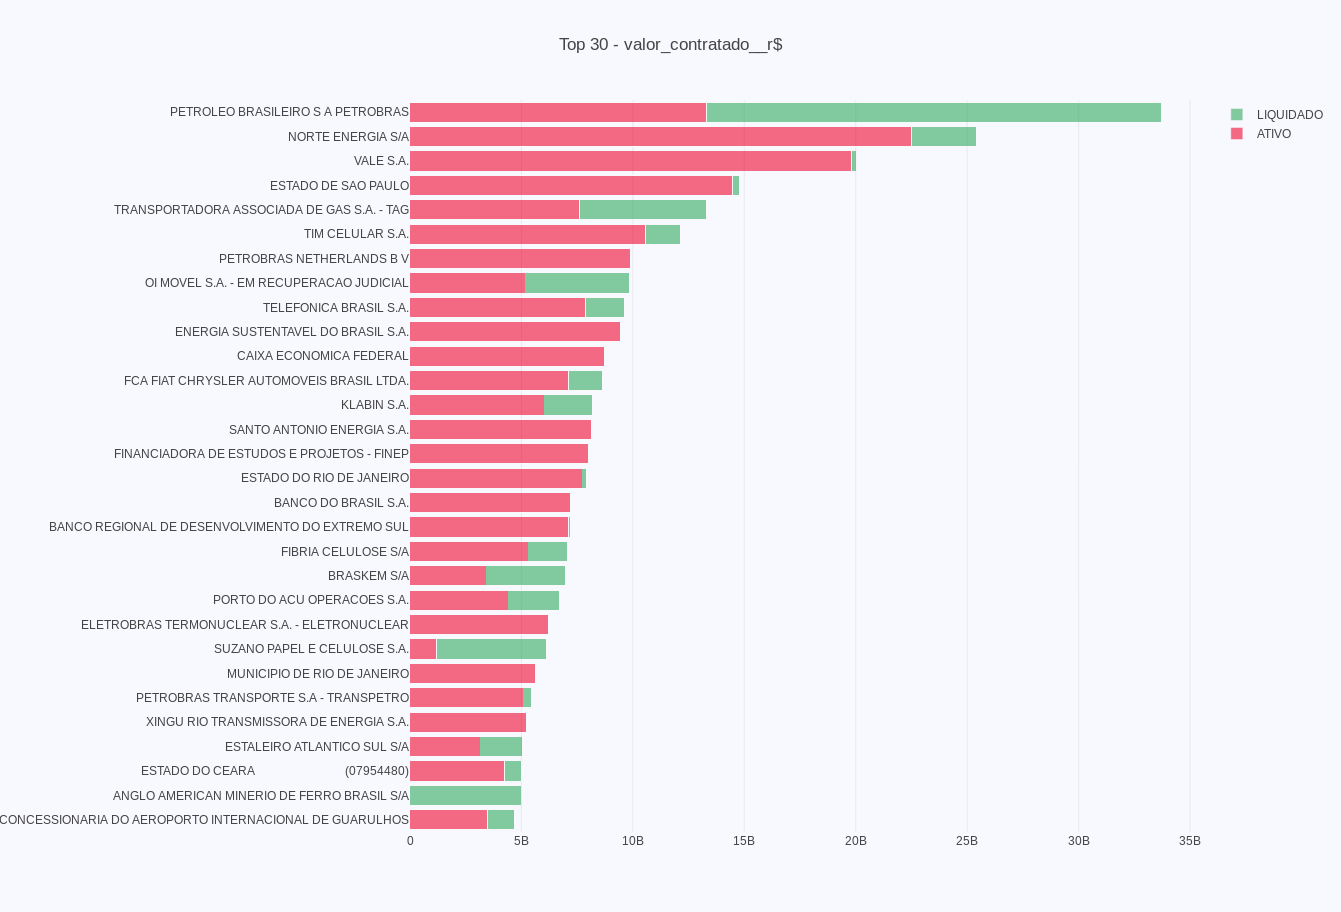

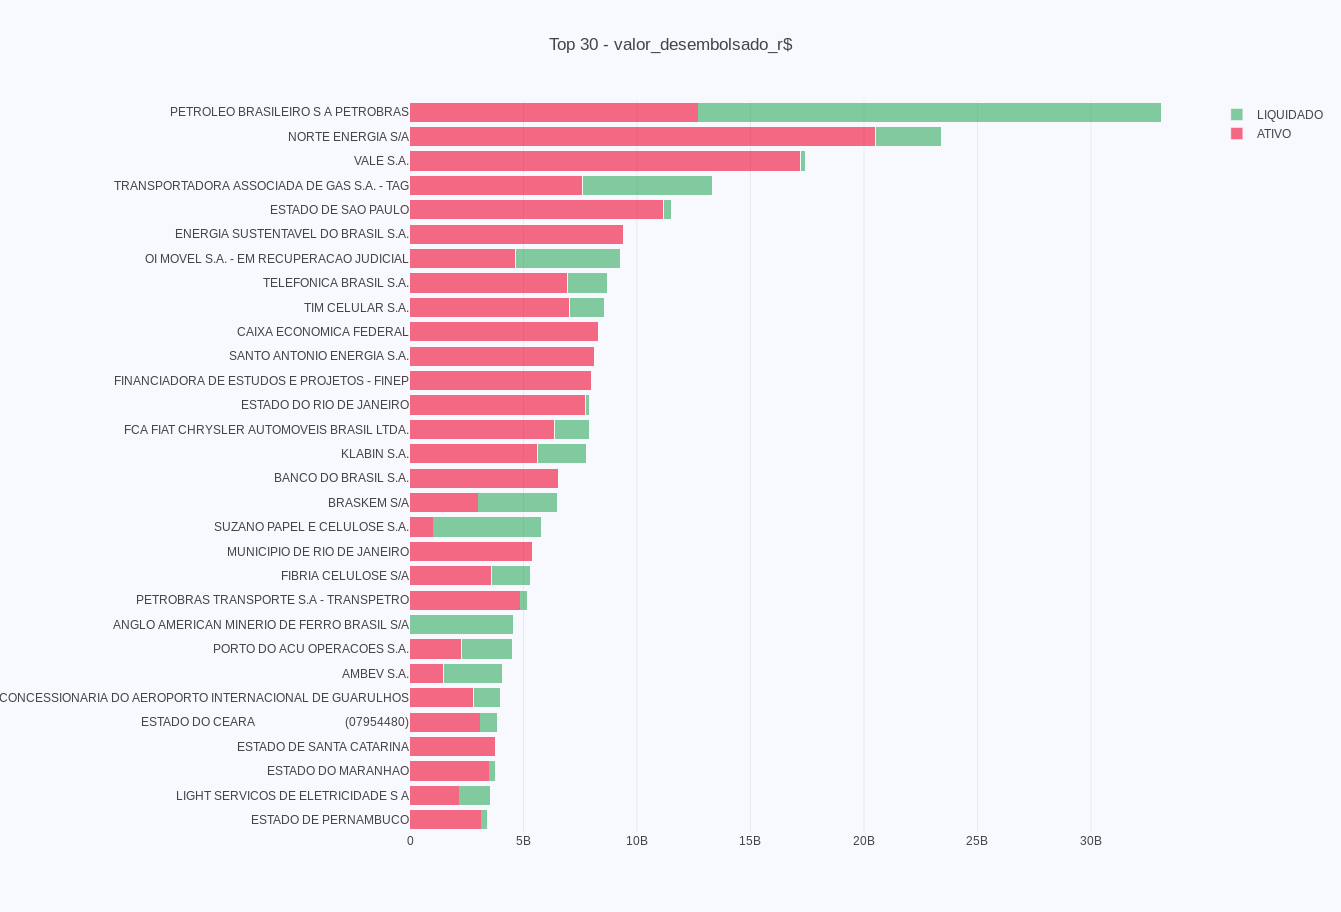

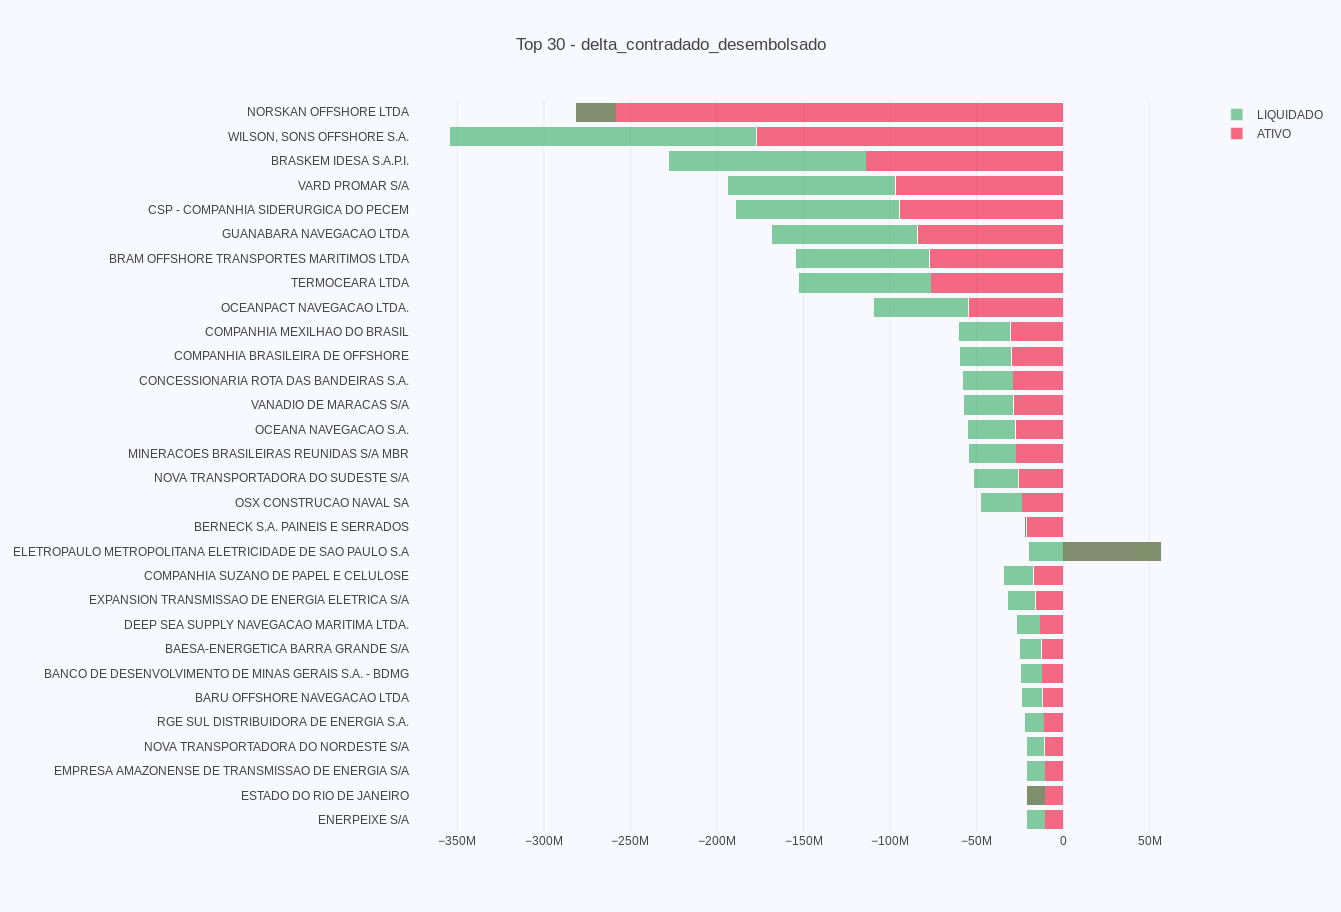

In [280]:
# df_merge = df_merge[]

N = 30
classes = ['valor_contratado__r$','valor_desembolsado_r$','delta_contradado_desembolsado']
bar_name = 'cliente'
bar_stack=['ATIVO','LIQUIDADO']
bar_stack_name = 'situação_do_contrato'


for clas in classes:
    
    bla1=False
    
    if clas == 'delta_contradado_desembolsado':
        bla1 = True
        
    df_merge = pd.merge(df_contrat_ativo_gb,df_contrat_cliente_value_total.sort_values(by='total_{}'.format(clas),ascending=bla1).iloc[:N],on=bar_name,how='inner')


    dd = df_merge[df_merge.groupby(bar_name)[bar_name].transform(len) ==1]
    cols = dd.columns[2:4]
    dd[cols] = 0
    dd[bar_stack_name] = np.where(dd[bar_stack_name]==bar_stack[1],bar_stack[0],bar_stack[1])

    df_plot= pd.concat([df_merge,dd],axis=0)
    
    bla2=True
    
    if clas == 'delta_contradado_desembolsado':
        bla2 = False
        
    cols = ['total_{}'.format(clas),bar_name,bar_stack_name]
    df_plot = df_plot.sort_values(by=cols,ascending=bla2)




    plot_classif_stack(df_plot,clas,bar_name,bar_stack_name,bar_stack,N)
